# 🌿 🧠 Understanding Convolutional Neural Networks - Simplified

Welcome to this Simplified guide on convolutional neural networks (CNNs)! In this notebook, we'll break down the concepts of CNNs in a simple and clear manner. By the end, you'll have a solid understanding of how CNNs work and how to create one using Python.

Convolutional neural networks have practical applications in various fields, including image recognition, object detection, and more.

## Table of Contents
1. [What is a Convolutional Neural Network?](#What-is-a-Convolutional-Neural-Network?)
2. [Building Blocks of Convolutional Neural Networks](#Building-Blocks-of-Convolutional-Neural-Networks)
3. [Loading and Preprocessing Data](#Loading-and-Preprocessing-Data)
4. [Building the CNN Model](#Building-the-CNN-Model)
5. [Compiling the Model](#Compiling-the-Model)
6. [Training the Model](#Training-the-Model)
7. [Evaluating the Model](#Evaluating-the-Model)
8. [Making Predictions](#Making-Predictions)
9. [Plotting Test Images and Predictions](#Plotting-Test-Images-and-Predictions)
10. [Visualizing Training Results](#Visualizing-Training-Results)
11. [Confusion Matrix](#Confusion-Matrix)
12. [Common Challenges and Solutions](#Common-Challenges-and-Solutions)
13. [Resources for Further Learning](#Resources-for-Further-Learning)
14. [Conclusion](#Conclusion)


## What is a Convolutional Neural Network?

A convolutional neural network (CNN) is a specialized type of neural network designed to process and recognize patterns in visual data. CNNs are particularly effective for image recognition tasks because they can capture spatial hierarchies in images through the use of convolutional layers.

### Key Concepts
- **Convolutional Layer:** Applies a convolution operation to the input, passing the result to the next layer. It uses filters (kernels) to detect features such as edges, textures, and patterns.
- **Pooling Layer:** Reduces the spatial dimensions of the input, helping to decrease the computational load and control overfitting. Common types include max pooling and average pooling.
- **Fully Connected Layer:** Connects every neuron in one layer to every neuron in the next layer, similar to a traditional neural network. Typically used in the final layers of a CNN.
- **Receptive Field:** The region of the input image that a particular CNN layer neuron is responsible for processing.



## Building Blocks of Convolutional Neural Networks

### Convolutional Layers
Convolutional layers are the core building blocks of a CNN. They apply a set of filters to the input image, each producing a feature map that highlights different aspects of the image, such as edges or textures.

### Pooling Layers
Pooling layers reduce the dimensions of the feature maps, retaining the most important information while discarding less important details. This helps in reducing the computational complexity and the risk of overfitting.

### Fully Connected Layers
Fully connected layers are used towards the end of the network, where the high-level reasoning in the network is done. They take the feature maps from the convolutional and pooling layers and output the final prediction.

### Activation Functions
Activation functions introduce non-linearity into the model, allowing it to learn complex patterns. Common activation functions used in CNNs include ReLU and Softmax.


## Loading and Preprocessing Data

First, we need to load a dataset and preprocess it. We'll use the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

Normalization, which scales the pixel values to the range 0-1, is important because it helps in faster convergence during training.


In [1]:
# Loading and Preprocessing Data

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to have values between 0 and 1 by dividing by 255
# This helps in faster convergence during training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoded vectors
# This is necessary for the categorical crossentropy loss function
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


2024-06-06 12:45:51.626649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 12:45:51.626769: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 12:45:51.771663: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Building the CNN Model

Next, we'll build a simple CNN model using TensorFlow and Keras. The model consists of:
1. **Convolutional Layer:** 32 filters, kernel size 3x3, ReLU activation
2. **Pooling Layer:** Max pooling, pool size 2x2
3. **Convolutional Layer:** 64 filters, kernel size 3x3, ReLU activation
4. **Pooling Layer:** Max pooling, pool size 2x2
5. **Flatten Layer:** Flattens the 2D feature maps to a 1D vector
6. **Dense Layer:** 64 neurons, ReLU activation
7. **Output Layer:** 10 neurons (one for each class), Softmax activation


In [2]:
# Building the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize a Sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters, kernel size 3x3, ReLU activation function
# input_shape parameter specifies the shape of input data (32x32 pixels, 3 color channels)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer with pool size 2x2 to reduce the spatial dimensions
model.add(MaxPooling2D((2, 2)))

# Add the second convolutional layer with 64 filters, kernel size 3x3, ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D feature maps to a 1D vector to prepare for the fully connected layer
model.add(Flatten())

# Add a fully connected layer with 64 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add the output layer with 10 neurons (one for each class) and softmax activation function
model.add(Dense(10, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Compiling the Model

We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.

- **Optimizer (Adam):** Efficient for training deep learning models.
- **Loss Function (Categorical Crossentropy):** Suitable for multi-class classification.
- **Metrics (Accuracy):** Evaluates the model's performance by calculating the percentage of correctly predicted instances.


In [3]:
# Compiling the Model

# Compile the model by specifying the optimizer, loss function, and metrics
model.compile(optimizer='adam',                        # Adam optimizer
              loss='categorical_crossentropy',         # Categorical crossentropy loss function for multi-class classification
              metrics=['accuracy'])                    # Evaluation metric: accuracy


## Training the Model

Now, we'll train the model using the training data. We'll set the number of epochs to 10 and use 20% of the training data for validation.

An epoch is one complete iteration over the entire training data. Validation data is used to evaluate the model's performance on data it hasn't seen during training, helping to detect overfitting.


In [4]:
# Training the Model

# Train the model with the training data
history = model.fit(x_train,                           # Training data
                    y_train,                           # Training labels
                    epochs=10,                         # Number of epochs
                    validation_split=0.2)              # Use 20% of training data for validation


Epoch 1/10
  73/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1408 - loss: 2.2827

I0000 00:00:1717677976.556613      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717677976.573402      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1230/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3505 - loss: 1.7716

W0000 00:00:1717677980.189116      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3520 - loss: 1.7678 - val_accuracy: 0.5436 - val_loss: 1.3000
Epoch 2/10
  77/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5377 - loss: 1.2877

W0000 00:00:1717677981.470726      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5591 - loss: 1.2459 - val_accuracy: 0.6009 - val_loss: 1.1324
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6215 - loss: 1.0783 - val_accuracy: 0.6341 - val_loss: 1.0532
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6510 - loss: 1.0030 - val_accuracy: 0.6522 - val_loss: 1.0192
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6789 - loss: 0.9279 - val_accuracy: 0.6565 - val_loss: 0.9973
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6949 - loss: 0.8729 - val_accuracy: 0.6509 - val_loss: 1.0151
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7093 - loss: 0.8286 - val_accuracy: 0.6715 - val_loss: 0.9567
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7284 - loss: 0.7831 - val_accuracy: 0.6698 - val_loss: 0.9580
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7382 - loss: 0.7440 - val_accurac

## Evaluating the Model

After training, we can evaluate the model's performance using the test data. We'll measure the test accuracy to see how well the model generalizes to new data.


In [5]:
# Evaluating the Model

# Evaluate the model's performance using the test data
test_loss, test_acc = model.evaluate(x_test,           # Test data
                                     y_test,           # Test labels
                                     verbose=2)        # Verbose output for evaluation
print('\nTest accuracy:', test_acc)                    # Print the test accuracy


313/313 - 1s - 2ms/step - accuracy: 0.6795 - loss: 0.9638

Test accuracy: 0.6794999837875366


## Making Predictions

After evaluating the model, we can use it to make predictions on new data. The model outputs probabilities for each class, and we use `argmax` to get the index of the highest probability, which corresponds to the predicted class.


In [6]:
# Making Predictions

# Make predictions on the test data
predictions = model.predict(x_test) # Predictions will be in the form of probability distributions

# Display the prediction for the first test image
print(predictions[0])  # Print the prediction for the first test image


103/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

W0000 00:00:1717678015.617150      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


W0000 00:00:1717678016.350987      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[1.08365384e-04 5.95737183e-05 2.71075009e-03 8.16675425e-01
 7.69241014e-04 9.64462161e-02 3.50894476e-03 1.38423493e-04
 6.86966628e-02 1.08864252e-02]


## Plotting Test Images and Predictions

We'll plot a few test images along with their predicted labels to visually inspect the model's predictions.

The images are displayed in color, and the titles of the plots show the predicted labels.


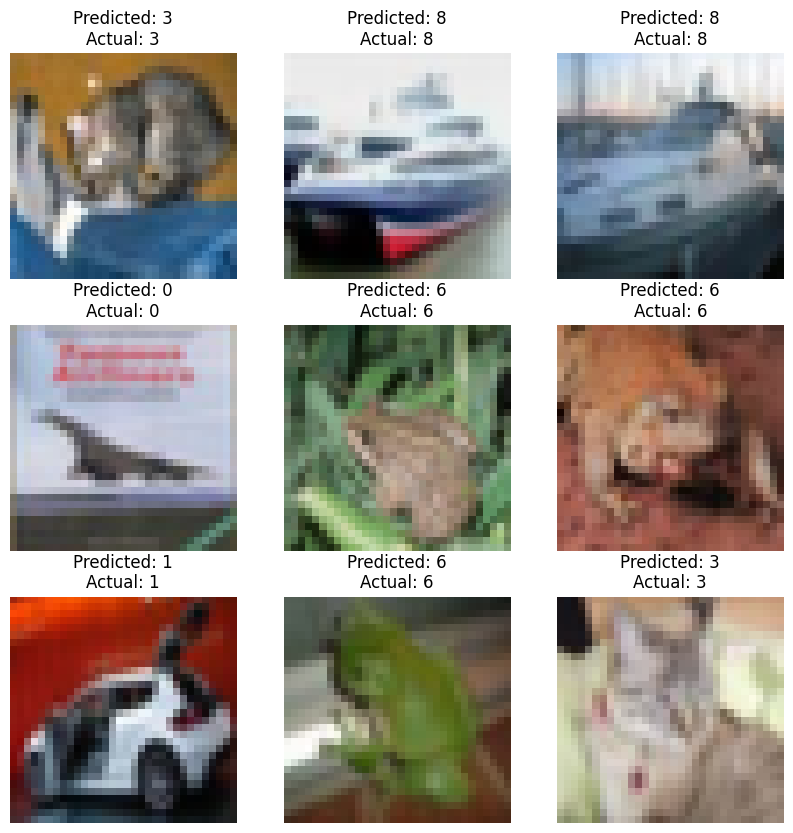

In [7]:
# Plotting Test Images and Predictions

import matplotlib.pyplot as plt

# Plot some test images with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):                                     # Plot the first 9 test images
    plt.subplot(3, 3, i + 1)                           # Create a 3x3 grid of subplots
    plt.imshow(x_test[i])                              # Display the image
    plt.title(f"Predicted: {predictions[i].argmax()}\nActual: {y_test[i].argmax()}")  # Show predicted and actual labels
    plt.axis('off')                                    # Hide the axis
plt.show()                                             # Display the plot


## Visualizing Training Results

Let's plot the training and validation accuracy and loss over the epochs to see how the model's performance improved during training.

These plots help in understanding the model's learning process and identifying potential issues like overfitting.


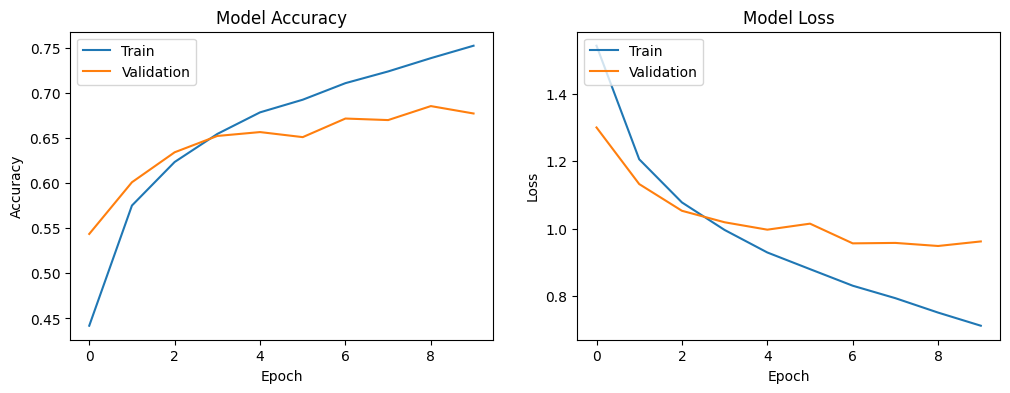

In [8]:
# Visualizing Training Results

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   # Create subplot for accuracy
plt.plot(history.history['accuracy'])                  # Plot training accuracy
plt.plot(history.history['val_accuracy'])              # Plot validation accuracy
plt.title('Model Accuracy')                            # Title of the plot
plt.ylabel('Accuracy')                                 # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

# Plot training & validation loss values
plt.subplot(1, 2, 2)                                   # Create subplot for loss
plt.plot(history.history['loss'])                      # Plot training loss
plt.plot(history.history['val_loss'])                  # Plot validation loss
plt.title('Model Loss')                                # Title of the plot
plt.ylabel('Loss')                                     # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

plt.show()                                             # Display the plots


## Confusion Matrix

To better understand the model's performance across different classes, we can visualize a confusion matrix. This helps identify which classes are being correctly classified and which are being misclassified.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


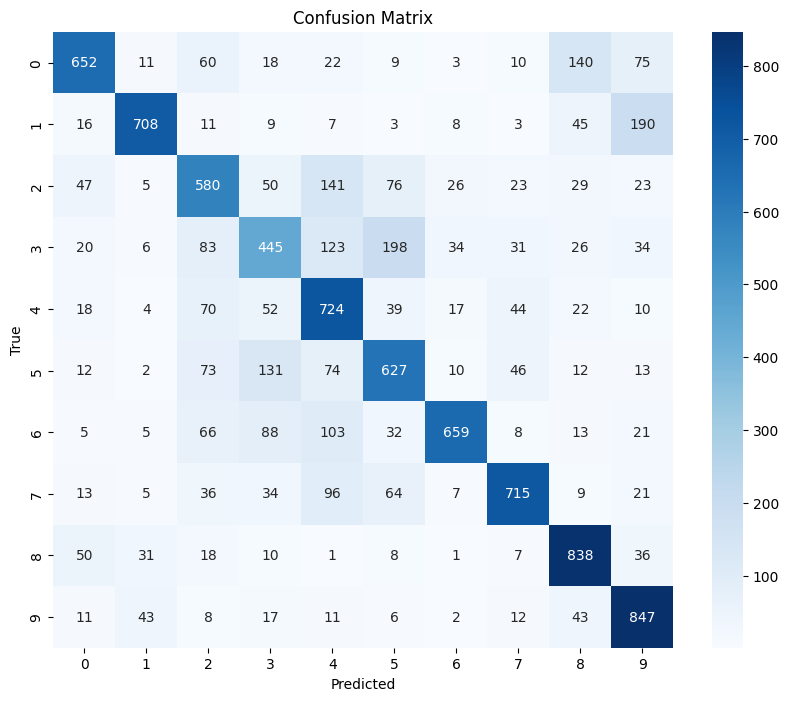

In [9]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test data
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Common Challenges and Solutions

**1. Overfitting:**
- **Problem:** The model performs well on training data but poorly on unseen test data.
- **Solutions:**
  - **Dropout:** Randomly sets a fraction of the input units to 0 at each update during training to prevent over-reliance on specific neurons.
  - **Regularization:** Adds a penalty to the loss function to limit model complexity. Common techniques include L1 (Lasso) and L2 (Ridge) regularization.
  - **Increase Training Data:** Collect more data or use data augmentation techniques to create variations of existing data, which helps the model generalize better.

**2. Underfitting:**
- **Problem:** The model is too simple to capture the underlying patterns in the data, leading to poor performance on both training and test data.
- **Solutions:**
  - **Increase Model Complexity:** Add more layers or neurons to the network.
  - **Use More Features:** Incorporate additional relevant features into the model.
  - **Train Longer:** Increase the number of epochs or reduce the learning rate to allow the model to learn more effectively.

**3. Vanishing/Exploding Gradients:**
- **Problem:** Gradients become too small (vanishing) or too large (exploding) during backpropagation, causing training to stall or become unstable.
- **Solutions:**
  - **Appropriate Activation Functions:** Use activation functions like ReLU, which mitigate the vanishing gradient problem by allowing gradients to flow through the network.
  - **Proper Initialization:** Use techniques like He initialization for ReLU activations or Xavier initialization for sigmoid/tanh activations to maintain gradient flow.
  - **Gradient Clipping:** Clip gradients during backpropagation to prevent them from becoming too large.

**4. Slow Training:**
- **Problem:** Training a neural network can be time-consuming, especially with large datasets and complex models.
- **Solutions:**
  - **Use GPUs:** Leverage the parallel processing power of GPUs to speed up computations.
  - **Batch Normalization:** Normalize the inputs of each layer to stabilize learning and improve convergence speed.
  - **Efficient Algorithms:** Use optimized algorithms and libraries designed for high-performance deep learning, such as TensorFlow and PyTorch.

**5. Data Imbalance:**
- **Problem:** The training data has an unequal distribution of classes, leading to biased predictions towards the majority class.
- **Solutions:**
  - **Resampling:** Use techniques like oversampling the minority class or undersampling the majority class to balance the dataset.
  - **Class Weights:** Assign higher weights to the minority class in the loss function to give it more importance during training.
  - **Synthetic Data:** Generate synthetic data for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

**6. Hyperparameter Tuning:**
- **Problem:** Finding the optimal set of hyperparameters (e.g., learning rate, batch size, number of layers) can be challenging and time-consuming.
- **Solutions:**
  - **Grid Search:** Explore a predefined set of hyperparameter values systematically.
  - **Random Search:** Sample hyperparameter values randomly within specified ranges.
  - **Bayesian Optimization:** Use probabilistic models to find the optimal hyperparameters more efficiently.

**7. Interpretability:**
- **Problem:** Neural networks are often considered "black boxes" due to their complexity, making it difficult to interpret their decisions.
- **Solutions:**
  - **Visualization Tools:** Use tools like TensorBoard to visualize the model’s performance and understand its behavior.
  - **Model-Agnostic Methods:** Apply techniques like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the model’s predictions.
  - **Simpler Models:** When possible, use simpler models like decision trees or linear models, which are inherently more interpretable.

By addressing these common challenges, you can build more robust and effective convolutional neural network models.


## Resources for Further Learning

- [Deep Learning by Ian Goodfellow](https://www.deeplearningbook.org/)
- [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
- [TensorFlow Documentation](https://www.tensorflow.org/tutorials)
- [Keras Documentation](https://keras.io/)
- [Stanford CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)


## Conclusion

In this notebook, we covered the basics of convolutional neural networks, including what they are, their key components, and how they work. We built a simple CNN model to classify images from the CIFAR-10 dataset, and we discussed common challenges and solutions in CNN training. This notebook serves as an introduction, providing a foundation for further exploration into more advanced topics such as advanced CNN architectures, transfer learning, and state-of-the-art models.

While this guide covers essential concepts and practical steps, convolutional neural networks are a vast field with continuous advancements and complexities. To truly master CNNs, you'll need to dive deeper into specific areas, experiment with different architectures, and stay updated with the latest research.

With this foundation, you're ready to explore more advanced topics and applications. Keep learning, experimenting, and pushing the boundaries of what you can achieve with convolutional neural networks.

Happy learning!
